In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics

Faça uma análise de
clustering e retire algumas conclusões sobre a segmentação de clientes. Para isso, devem ser utilizados
pelo menos os seguintes algoritmos: K-Means,  DBSCAN; Agglomerative Clustering. 
Utilize o ficheiro com o nome “segmentation data.csv” para realizar a sua análise. As principais conclusões que
devem ser retiraram devem ter em consideração as seguintes dimensões:
1) Número de perfis de clientes segmentados;
2) Principais características dos clientes segmentados;
3) Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos dominante;
4) Existem clusters bem separados ou onde a sua diferenciação não é tão clara?

In [2]:
df = pd.read_csv('segmentation data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB
None


In [4]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
# Removendo colunas desnecessárias
df = df.drop(columns=['CustomerID'])
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [8]:
# Normalizar os dados
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
# Determinando os números de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


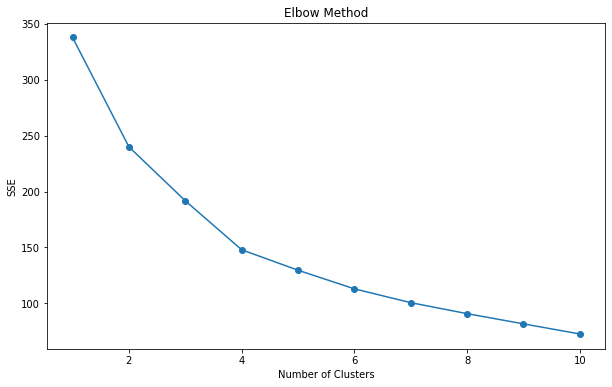

In [10]:
# Plotando o gráfico elbow 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [11]:
X = df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

K-Means

In [12]:
# Treinando o modelo 
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster_KMeans'] = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, df['Cluster_KMeans'])
print(f"Silhouette Score for K-Means: {kmeans_score}")

Silhouette Score for K-Means: 0.4440669204743008


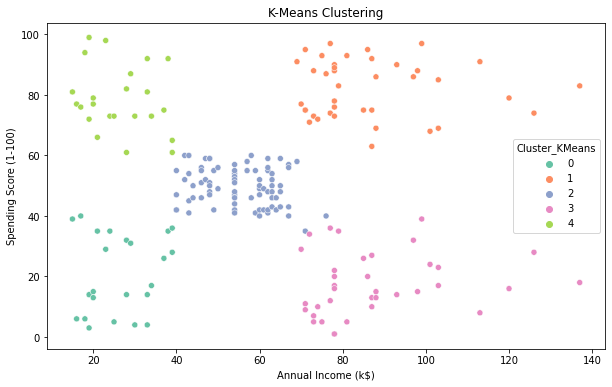

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_KMeans'], palette='Set2')
plt.title('K-Means Clustering')
plt.show()

 DBSCAN

In [14]:
Y = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

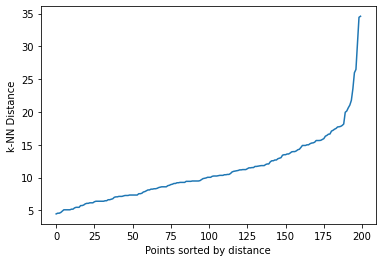

In [15]:
from sklearn.neighbors import NearestNeighbors

# Escolha um valor para k (geralmente igual a min_samples)
k = 5

# Calcule a distância k-ésima
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(Y)
distances, indices = neighbors_fit.kneighbors(Y)

# Ordenar as distâncias
distances = np.sort(distances[:, k-1], axis=0)

# Plotar o gráfico de distância k-ésima
plt.plot(distances)
plt.ylabel('k-NN Distance')
plt.xlabel('Points sorted by distance')
plt.show()

In [16]:
dbscan = DBSCAN(eps=12, min_samples=7)
df['Cluster_DBSCAN'] = dbscan.fit_predict(Y)
dbscan_score = silhouette_score(Y, df['Cluster_DBSCAN'])
print(f"Silhouette Score for DBSCAN: {dbscan_score}")

Silhouette Score for DBSCAN: 0.20675480670600443


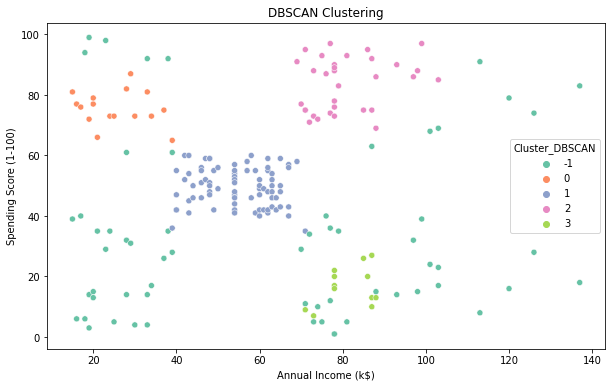

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_DBSCAN'], palette='Set2')
plt.title('DBSCAN Clustering')
plt.show()

Agglomerative Clustering

In [18]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)  # Adjust based on the number of clusters
df['Cluster_Agg'] = agg_clustering.fit_predict(X)
Cluster_Agg_score = silhouette_score(X,df['Cluster_Agg'])
print(f"Silhouette Score for Agglomerative Clustering: {Cluster_Agg_score}")

Silhouette Score for Agglomerative Clustering: 0.43997527212476695


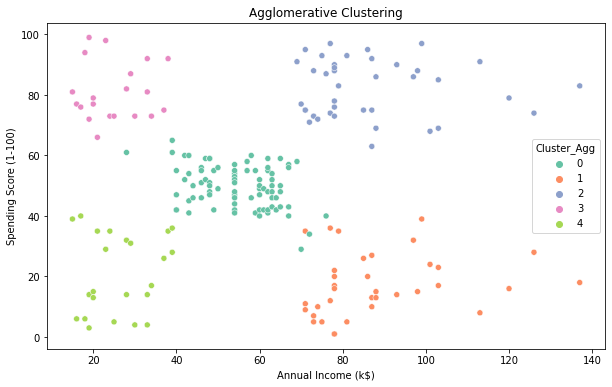

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_Agg'], palette='Set2')
plt.title('Agglomerative Clustering')
plt.show()

### Conclusões 

Dos algoritimos o K-Means foi o que melhor performou com o maior Silhouette Score for K-Means: 0.4440669204743008, o Agglomerative Clustering com o desempenho bem próximo com o Silhouette Score for Agglomerative Clustering: 0.43997527212476695, por fim DBSCAN com Silhouette Score for DBSCAN: 0.20675480670600443.

Análise dos Clusters

In [20]:
cluster_0 = df[df['Cluster_KMeans'] == 0]
cluster_0.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_DBSCAN,Cluster_Agg
count,23.000000,23.000000,23.000000,23.000000,23.0,23.000000,23.0
mean,0.391304,45.217391,26.304348,20.913043,0.0,-0.913043,4.0
std,0.499011,13.228607,7.893811,13.017167,0.0,0.417029,0.0
min,0.000000,19.000000,15.000000,3.000000,0.0,-1.000000,4.0
25%,0.000000,35.500000,19.500000,9.500000,0.0,-1.000000,4.0
50%,0.000000,46.000000,25.000000,17.000000,0.0,-1.000000,4.0
75%,1.000000,53.500000,33.000000,33.500000,0.0,-1.000000,4.0
max,1.000000,67.000000,39.000000,40.000000,0.0,1.000000,4.0


In [21]:
# O cluster_0 composto de 23 elementos, de ambos sexos, com idade média 45.2 anos, renda anual média de 26.3 (k$).
# O Spending Score médio de 20.9

In [22]:
cluster_1 = df[df['Cluster_KMeans'] == 1]
cluster_1.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_DBSCAN,Cluster_Agg
count,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.0
mean,0.461538,32.692308,86.538462,82.128205,1.0,1.461538,2.0
std,0.505035,3.728650,16.312485,9.364489,0.0,1.166329,0.0
min,0.000000,27.000000,69.000000,63.000000,1.0,-1.000000,2.0
25%,0.000000,30.000000,75.500000,74.500000,1.0,2.000000,2.0
50%,0.000000,32.000000,79.000000,83.000000,1.0,2.000000,2.0
75%,1.000000,35.500000,95.000000,90.000000,1.0,2.000000,2.0
max,1.000000,40.000000,137.000000,97.000000,1.0,2.000000,2.0


In [23]:
# O cluster_1 composto de 39 elementos, de ambos sexos, com idade média 32.6 anos, renda anual média de 86.53 (k$)
# O Spending Score médio de 82.12

In [24]:
cluster_2 = df[df['Cluster_KMeans'] == 2]
cluster_2.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_DBSCAN,Cluster_Agg
count,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.000000
mean,0.417722,43.088608,55.291139,49.569620,2.0,0.974684,0.012658
std,0.496335,16.478572,8.710665,6.242295,0.0,0.225018,0.112509
min,0.000000,18.000000,40.000000,35.000000,2.0,-1.000000,0.000000
25%,0.000000,27.000000,48.000000,44.500000,2.0,1.000000,0.000000
50%,0.000000,47.000000,54.000000,50.000000,2.0,1.000000,0.000000
75%,1.000000,54.500000,62.000000,55.000000,2.0,1.000000,0.000000
max,1.000000,70.000000,76.000000,60.000000,2.0,1.000000,1.000000


In [25]:
# O cluster_2 composto de 79 elementos, de ambos sexos, com idade média 43 anos, renda anual média de 55.29(k$).
# O Spending Score médio de 49.56

In [26]:
cluster_3 = df[df['Cluster_KMeans'] == 3]
cluster_3.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_DBSCAN,Cluster_Agg
count,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000
mean,0.527778,40.666667,87.750000,17.583333,3.0,0.333333,0.944444
std,0.506309,11.496583,16.387059,10.204691,0.0,1.912366,0.232311
min,0.000000,19.000000,70.000000,1.000000,3.0,-1.000000,0.000000
25%,0.000000,34.000000,77.000000,10.000000,3.0,-1.000000,1.000000
50%,1.000000,41.500000,83.000000,16.000000,3.0,-1.000000,1.000000
75%,1.000000,47.250000,97.250000,24.500000,3.0,3.000000,1.000000
max,1.000000,59.000000,137.000000,39.000000,3.0,3.000000,1.000000


In [27]:
# O cluster_3 composto de 36 elementos de ambos os sexos, com idade média 40.6 anos, renda anual média de 87.75(k$)
# o Spending Score médio de 17.58 pontos

In [28]:
cluster_4 = df[df['Cluster_KMeans'] == 4]
cluster_4.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_DBSCAN,Cluster_Agg
count,23.000000,23.000000,23.000000,23.000000,23.0,23.000000,23.000000
mean,0.391304,25.521739,26.304348,78.565217,4.0,-0.304348,2.608696
std,0.499011,5.273170,7.893811,10.953729,0.0,0.470472,1.033051
min,0.000000,18.000000,15.000000,61.000000,4.0,-1.000000,0.000000
25%,0.000000,21.500000,19.500000,73.000000,4.0,-1.000000,3.000000
50%,0.000000,24.000000,25.000000,77.000000,4.0,0.000000,3.000000
75%,1.000000,30.000000,33.000000,84.500000,4.0,0.000000,3.000000
max,1.000000,35.000000,39.000000,99.000000,4.0,0.000000,3.000000


In [29]:
# O cluster_4 composto de 23 elementos, de ambos sexos, com idade média 25 anos, renda anual média de 26.3 (k$).
# O Spending Score médio de 78.56

Respondendo as questões:
1) Número de perfis de clientes segmentados;
   - Foram seguimentados cinco perfis de clientes.
2) Principais características dos clientes segmentados;
   - O cluster_0 composto de 23 elementos, de ambos sexos, com idade média 45.2 anos, renda anual média de 26.3 k$. O Spending Score médio de 20.9.
   
   - O cluster_1 composto de 39 elementos, de ambos sexos, com idade média 32.6 anos, renda anual média de 86.53 k$. O Spending Score médio de 82.12.
   
   - O cluster_2 composto de 79 elementos, de ambos sexos, com idade média 43 anos, renda anual média de 55.29 k$.O Spending Score médio de 49.56.
   
   - O cluster_3 composto de 36 elementos de ambos os sexos, com idade média 40.6 anos, renda anual média de 87.75 k$.O Spending Score médio de 17.58 pontos
   
   - O cluster_4 composto de 23 elementos, de ambos sexos, com idade média 25 anos, renda anual média de 26.3 k$.O Spending Score médio de 78.56
3) Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos dominante;
    - O perfil dos clientes maioritários, é o perfil do cluster_2 com 79 elementos, já os minoritários temos  cluster_0 e o cluster_4 com 23 elementos.
4) Existem clusters bem separados ou onde a sua diferenciação não é tão clara?
    - Sim os clusters estão bem separados, exceto o cluster_2 que faz fronteira com todos os demais clusters, em que os elementos na sua extremidade dependendo da métrica pode ser avaliado de outro cluster. 

Usando Collaborative
Filtering, quer CF baseado em items ou Fatorização de Matrizes, escolha 3 utilizadores e faça a
sugestão de um top 5 de anedotas por utilizador. Tenham em consideração que os utilizadores
escolhidos devem ter gostos por tipos de anedotas diferentes. Justifiquem a escolha dos utilizadores.
Desta maneira será possível avaliar se as anedotas sugeridas realmente foram bem-sucedidas.
Adicionalmente, descrevam a abordagem escolhida para recomendação de anedotas e justifiquem o
porquê dessa abordagem ser a melhor neste contexto.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD

In [31]:
ratings = pd.read_csv('ratings.csv')
items = pd.read_csv('items.csv')

In [32]:
items

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...
...,...,...
145,146,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,147,It was the day of the big sale. Rumors of the ...
147,148,"Recently a teacher, a garbage collector, and a..."
148,149,"A little girl asked her father, ""Daddy? Do all..."


In [33]:
ratings

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875
...,...,...,...
1761434,63978,57,-8.531
1761435,63978,24,-9.062
1761436,63978,124,-9.031
1761437,63978,58,-8.656


In [34]:
ratings.sum()

userId    5.763995e+10
jokeId    1.245537e+08
rating    2.851069e+06
dtype: float64

In [35]:
# Preparar a Matriz
user_item_matrix = ratings.pivot(index='userId', columns='jokeId', values='rating').fillna(0)

In [36]:
user_item_matrix

jokeId,5,7,8,13,15,16,17,18,19,20,...,141,142,143,144,145,146,147,148,149,150
userId,,,,,,,,,,,,,,,,,,,,,
1,0.219,-9.281,-9.281,-6.781,0.875,-9.656,-9.031,-7.469,-8.719,-9.156,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
2,-9.688,9.938,9.531,9.938,0.406,3.719,9.656,-2.688,-9.562,-9.125,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
3,-9.844,-9.844,-7.219,-2.031,-9.938,-9.969,-9.875,-9.812,-9.781,-6.844,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
4,-5.812,-4.500,-4.906,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
5,6.906,4.750,-5.906,-0.406,-4.031,3.875,6.219,5.656,6.094,5.406,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63974,0.000,-4.438,1.531,-1.438,-9.156,-7.438,2.250,3.750,5.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
63975,0.000,0.625,4.531,4.969,-3.375,-8.250,-7.781,-9.188,1.500,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
63976,0.000,-7.250,4.562,-5.594,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000


In [37]:
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=0)

In [38]:
svd = TruncatedSVD(n_components=50)
svd.fit(train_data)

TruncatedSVD(n_components=50)

In [39]:
user_factors = svd.transform(train_data)
item_factors = svd.components_

In [40]:
# Calcular a média dos ratings por utilizador
user_mean_ratings = ratings.groupby('userId')['rating'].mean().sort_values()

# Selecionar 3 utilizadores de diferentes quantis (baixo, médio, alto)
quantiles = user_mean_ratings.quantile([0.25, 0.5, 0.75])
low_user = user_mean_ratings[user_mean_ratings <= quantiles[0.25]].index[0]
mid_user = user_mean_ratings[(user_mean_ratings > quantiles[0.25]) & (user_mean_ratings <= quantiles[0.75])].index[0]
high_user = user_mean_ratings[user_mean_ratings > quantiles[0.75]].index[0]

selected_users = [low_user, mid_user, high_user]
print(f'Selected users: {selected_users}')


Selected users: [37677, 30022, 16130]


In [41]:
top_n = 5  

In [42]:
recommendations = {}
for user_id in selected_users:
    if user_id in user_item_matrix.index:
        user_index = user_item_matrix.index.get_loc(user_id)
        user_ratings = np.dot(user_factors[user_index, :], item_factors)
        top_items = np.argsort(user_ratings)[::-1][:top_n]
        recommendations[user_id] = top_items
    else:
        print(f"Usuário ID {user_id} não encontrado!")

In [43]:
for user_id, top_items in recommendations.items():
    print(f'Recommendations for user {user_id}:')
    for item_id in top_items:
        print(items.loc[items['jokeId'] == item_id, 'jokeText'].values[0])
    print()

Recommendations for user 37677:
Nurse: Doctor, Doctor, there's an invisible man in the waiting room! Doctor: Well, go in there and tell him that I can't see him!
A man in a hot air balloon realized he was lost. He reduced altitude and spotted a woman below. He descended a bit more and shouted, "Excuse me, can you help me? I promised a friend I would meet him an hour ago, but I don't know where I am." The woman below replied, "You are in a hot air balloon hovering approximately 30 feet above the ground. You are between 40 and 41 degrees north latitude and between 59 and 60 degrees west longitude." "You must be an engineer," said the balloonist. "I am," replied the woman. "How did you know?" "Well," answered the balloonist, "everything you told me is technically correct, but I have no idea what to make of your information, and the fact is, I am still lost. Frankly, you've not been much help so far." The woman below responded, "You must be in management." "I am," replied the balloonist, "

## Justificativas

-O método escolhido foi a Fatoração de Matrizes com TruncatedSVD, que é eficitente para fatoração de matrizes de grande dimensão, gerando recomendações para os usuários.

-Os usuários foram escolhidos com base nos seus ratings médios para os diferentes items, desta forma conseguimos selecionar usuários de diferentes quantis.